In [1]:
install.packages("mlr3verse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘globals’, ‘listenv’, ‘PRROC’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’, ‘Rcpp’, ‘gridExtra’, ‘checkmate’, ‘future’, ‘future.apply’, ‘lgr’, ‘mlbench’, ‘mlr3measures’, ‘parallelly’, ‘palmerpenguins’, ‘clue’, ‘fpc’, ‘spacefillr’, ‘viridis’, ‘mlr3’, ‘bbotk’, ‘mlr3cluster’, ‘mlr3data’, ‘mlr3filters’, ‘mlr3fselect’, ‘mlr3hyperband’, ‘mlr3learners’, ‘mlr3mbo’, ‘mlr3misc’, ‘mlr3pipelines’, ‘mlr3tuning’, ‘mlr3tuningspaces’, ‘mlr3viz’, ‘paradox’




# R 1

In [2]:
#| label: import

library(mlr3verse)

Loading required package: mlr3



In [3]:
#| label: hro-objects

# You initialize your "learner" or model with its properties defined by the
# parameters, e.g.,:
model <- lrn("regr.lm")
# Before training them on actual data, they just contain information on the
# functional form of f. Once a learner has been trained we can examine the
# parameters of the resulting model.
print(model)
X <- seq(0, 8, by = 0.01)
set.seed(42)
y <- -1 + 3 * X + rnorm(mean = 0, sd = 4, n = length(X))
dt <- data.frame(x = X, y = y)
task <- TaskRegr$new(id = "mytask", backend = dt, target = "y")
# Optimization happens rather implicitly as sklearn only acts as a wrapper for
# existing implementations and calls package-specific optimization procedures
# within the function `model.fit()`:
model$train(task)
sprintf("Model MSE: %f", model$predict_newdata(dt)$score())

<LearnerRegrLM:regr.lm>
* Model: -
* Parameters: list()
* Packages: mlr3, mlr3learners, stats
* Predict Types:  [response], se
* Feature Types: logical, integer, numeric, character, factor
* Properties: loglik, weights


[1] "Model MSE: 15.104770"

In [4]:
#| label: hro-task

task_iris <- tsk("iris")
sprintf("Feature names: %s", task_iris$feature_names)
sprintf("Target name: %s", task_iris$target_names)

[1] "Feature names: Petal.Length" "Feature names: Petal.Width" 
[3] "Feature names: Sepal.Length" "Feature names: Sepal.Width"

[1] "Target name: Species"

In [5]:
#| label: hro-learner

# List available learners in base mlr3 package
mlr_learners$keys()

# Inspect regression tree learner
lrn("regr.rpart")

# List configurable hyperparameters
lrn("regr.rpart")$param_set

[1] "classif.cv_glmnet"   "classif.debug"       "classif.featureless"
 [4] "classif.glmnet"      "classif.kknn"        "classif.lda"        
 [7] "classif.log_reg"     "classif.multinom"    "classif.naive_bayes"
[10] "classif.nnet"        "classif.qda"         "classif.ranger"     
[13] "classif.rpart"       "classif.svm"         "classif.xgboost"    
[16] "clust.agnes"         "clust.ap"            "clust.cmeans"       
[19] "clust.cobweb"        "clust.dbscan"        "clust.diana"        
[22] "clust.em"            "clust.fanny"         "clust.featureless"  
[25] "clust.ff"            "clust.hclust"        "clust.kkmeans"      
[28] "clust.kmeans"        "clust.MBatchKMeans"  "clust.mclust"       
[31] "clust.meanshift"     "clust.pam"           "clust.SimpleKMeans" 
[34] "clust.xmeans"        "regr.cv_glmnet"      "regr.debug"         
[37] "regr.featureless"    "regr.glmnet"         "regr.kknn"          
[40] "regr.km"             "regr.lm"             "regr.nnet"          
[43] "regr.ranger"         "regr.rpart"          "regr.svm"           
[46] "regr.xgboost"

<LearnerRegrRpart:regr.rpart>: Regression Tree
* Model: -
* Parameters: xval=0
* Packages: mlr3, rpart
* Predict Types:  [response]
* Feature Types: logical, integer, numeric, factor, ordered
* Properties: importance, missings, selected_features, weights

<ParamSet>
                id    class lower upper nlevels        default value
 1:             cp ParamDbl     0     1     Inf           0.01      
 2:     keep_model ParamLgl    NA    NA       2          FALSE      
 3:     maxcompete ParamInt     0   Inf     Inf              4      
 4:       maxdepth ParamInt     1    30      30             30      
 5:   maxsurrogate ParamInt     0   Inf     Inf              5      
 6:      minbucket ParamInt     1   Inf     Inf <NoDefault[3]>      
 7:       minsplit ParamInt     1   Inf     Inf             20      
 8: surrogatestyle ParamInt     0     1       2              0      
 9:   usesurrogate ParamInt     0     2       3              2      
10:           xval ParamInt     0   Inf     Inf             10     0

# R 2

In [13]:
#| label: abalone-data

# Download data
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
abalone <- read.table(url, sep = ",", row.names = NULL)
colnames(abalone) <- c(
  "sex", "longest_shell", "diameter", "height", "whole_weight",
  "shucked_weight", "visceral_weight", "shell_weight", "rings"
)

# Reduce to relevant columns
abalone <- abalone[, c("longest_shell", "whole_weight", "rings")]

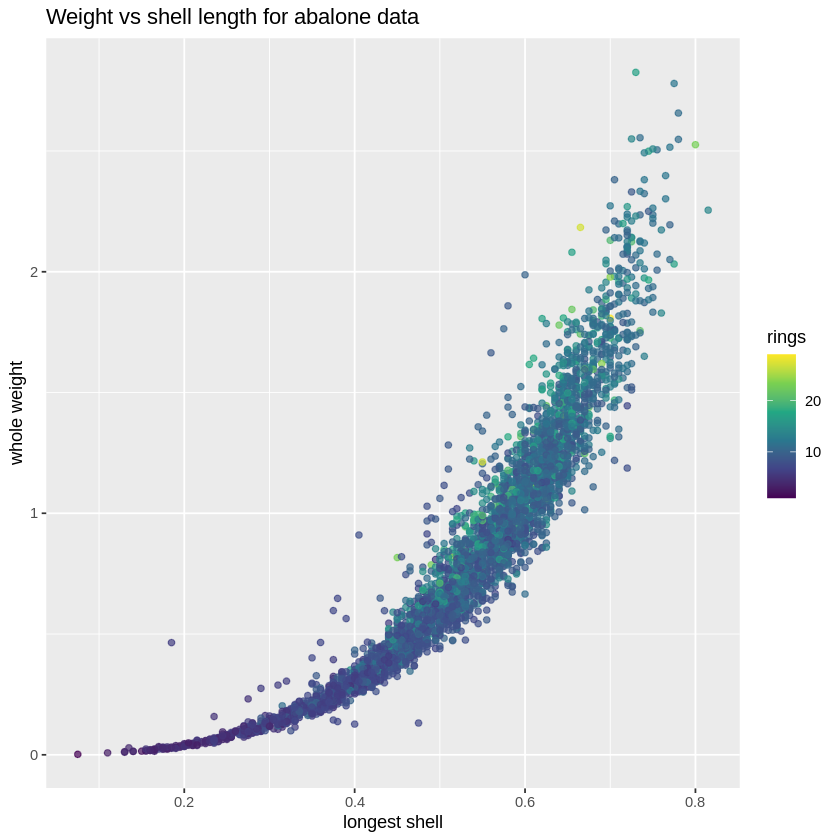

In [7]:
#| label: abalone-plot

library(ggplot2)

# Plot weight vs shell length
ggplot2::ggplot(
  abalone,
  aes(x = longest_shell, y = whole_weight, col = rings)) +
  ggplot2::geom_point(alpha = 0.7) +
  ggplot2::scale_color_viridis_c() +
  ggplot2::labs(
    x = "longest shell",
    y = "whole weight",
    title = "Weight vs shell length for abalone data"
  )

In [8]:
#| label: abalone-task

library(mlr3)

# Specify regression task
task_abalone <- TaskRegr$new(
  id = "abalone", backend = abalone, target = "rings"
)
task_abalone

<TaskRegr:abalone> (4177 x 3)
* Target: rings
* Properties: -
* Features (2):
  - dbl (2): longest_shell, whole_weight

In [9]:
#| label: abalone-predict

library(mlr3)
library(mlr3learners)

# Set up LM, train (by default, the target will be regressed on all features,
# i.e., target ~ .)
learner_lm <- mlr3::lrn("regr.lm")
print("Model before training:")
learner_lm$model

# Train and predict
learner_lm$train(task_abalone)
print("Model after training:")
learner_lm$model
pred_lm <- learner_lm$predict(task_abalone)

# Inspect predictions
print("Predictions:")
pred_lm

[1] "Model before training:"


NULL

[1] "Model after training:"



Call:
stats::lm(formula = task$formula(), data = task$data())

Coefficients:
  (Intercept)  longest_shell   whole_weight  
        3.431         10.582          1.155  


[1] "Predictions:"


<PredictionRegr> for 4177 observations:
    row_ids truth  response
          1    15  8.840042
          2     7  7.395659
          3     9  9.821995
---                        
       4175     9 11.139128
       4176    10 11.309553
       4177    12 13.195460

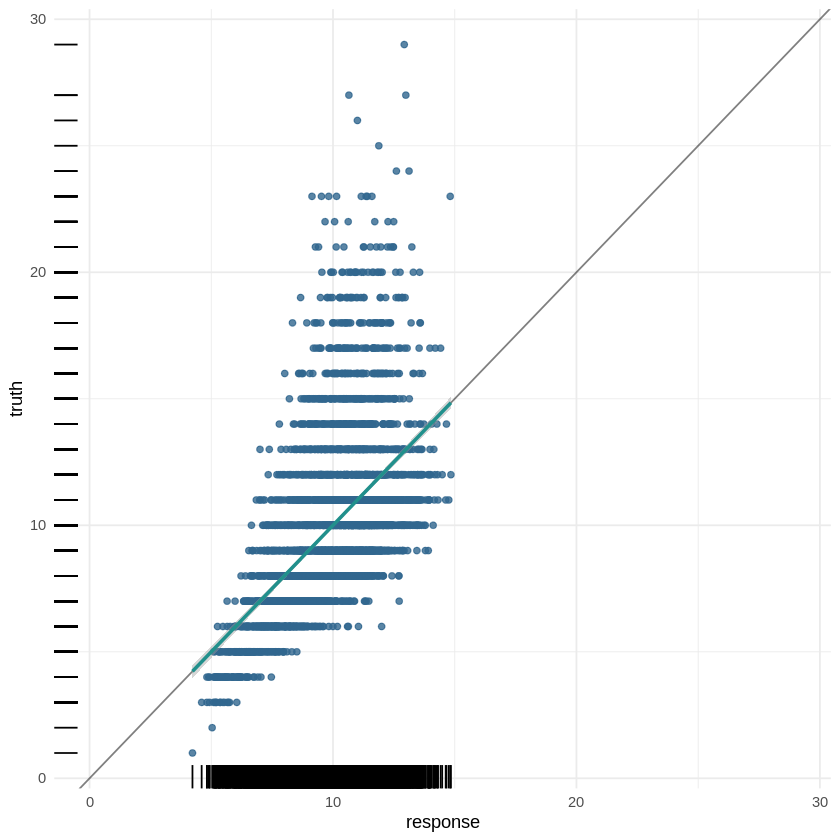

In [10]:
#| label: abalone-viz

library(mlr3viz)

# Get nice visualization with a one-liner
mlr3viz::autoplot(pred_lm) +
  xlim(c(0, max(abalone$rings)))

In [11]:
#| label: abalone-eval

# Define MAE metric
mae <- mlr3::msr("regr.mae")

# Assess performance (MSE by default)
pred_lm$score()
pred_lm$score(mae)

regr.mse 
7.125521

regr.mae 
 1.95066

In [12]:
# | label: abalone-interpretation

# All effects highly significant
summary(learner_lm$model)


Call:
stats::lm(formula = task$formula(), data = task$data())

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9976 -1.6747 -0.7428  0.9122 16.3478 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.4313     0.3156   10.87  < 2e-16 ***
longest_shell  10.5824     0.9071   11.67  < 2e-16 ***
whole_weight    1.1550     0.2221    5.20 2.09e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.67 on 4174 degrees of freedom
Multiple R-squared:  0.3144,	Adjusted R-squared:  0.314 
F-statistic: 956.9 on 2 and 4174 DF,  p-value: < 2.2e-16
